In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [2]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y

In [3]:
def gen_data(nobs=1000, a=0.25, num_params=4):
    x = np.random.normal(scale=1., size=(nobs,num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x.sum(axis=1) + e
    return y,x,nobs

In [4]:
def setup_model(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    model1_deriv = OLS_loglike(yn,sm.add_constant(xn))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    return ll1,grad1,hess1,params1


def setup_test(yn,xn):
    lls = []
    grads = []
    hesss = []
    params = []                
    for i in range(xn.shape[1]):
        ll,grad,hess,param = setup_model(yn,xn[:,i])
        lls.append(ll)
        grads.append(grad)
        hesss.append(hess)
        params.append(param)
    
    #determine 1 and 2
    lls_sum = np.array(lls).sum(axis=1)
    lls_sorted = lls_sum.copy()
    lls_sorted.sort()
    ind1,ind2 = lls_sorted[-2:]
    ind1 = (lls_sum == ind1).argmax()
    ind2 = (lls_sum == ind2).argmax()
    return lls[ind1],grads[ind1],hesss[ind1],params[ind1], lls[ind2],grads[ind2],hesss[ind2],params[ind2]

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_test(yn,xn)

# K = 4

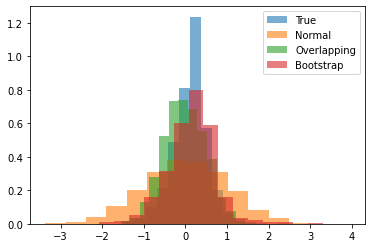

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.117 & 0.178 & -0.003 & 0.061 & -0.003 & 0.155 \\
Bootstrap & 0.144 & 0.334 & -0.005 & 0.234 & -0.005 & 0.566 \\
Normal & 0.010 & 0.989 & -0.010 & -0.094 & -0.010 & 2.839 \\
Overlapping & -0.019 & 0.249 & 0.008 & -0.011 & 0.008 & 0.175 \\
\bottomrule
\end{tabular}
\end{center}


In [5]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=4)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

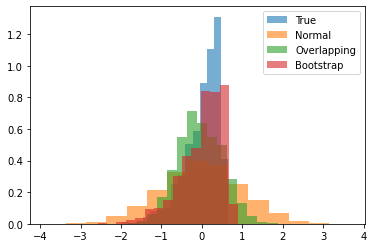

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.009 & 0.183 & -0.098 & 0.057 & -0.098 & 0.157 \\
Bootstrap & 0.012 & 0.286 & -0.168 & 0.095 & -0.167 & 0.338 \\
Normal & -0.014 & 1.007 & -0.006 & -0.011 & -0.006 & 3.031 \\
Overlapping & -0.033 & 0.300 & 0.010 & -0.025 & 0.010 & 0.245 \\
\bottomrule
\end{tabular}
\end{center}


In [6]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=4)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

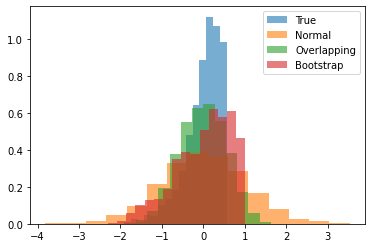

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.004 & 0.179 & -0.096 & 0.061 & -0.096 & 0.156 \\
Bootstrap & 0.004 & 0.452 & -0.221 & -0.025 & -0.220 & 0.586 \\
Normal & 0.013 & 1.026 & 0.040 & 0.100 & 0.040 & 3.253 \\
Overlapping & -0.010 & 0.313 & -0.007 & -0.030 & -0.007 & 0.263 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=4)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

# K = 9

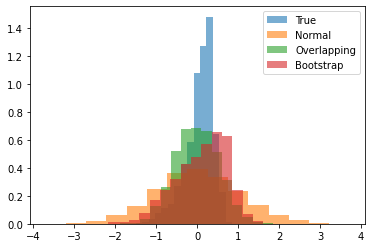

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.060 & 0.118 & -0.043 & 0.019 & -0.043 & 0.061 \\
Bootstrap & 0.096 & 0.414 & -0.157 & -0.005 & -0.157 & 0.508 \\
Normal & -0.002 & 1.031 & 0.016 & 0.009 & 0.016 & 3.193 \\
Overlapping & -0.007 & 0.274 & 0.004 & -0.016 & 0.004 & 0.209 \\
\bottomrule
\end{tabular}
\end{center}


In [8]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=9)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

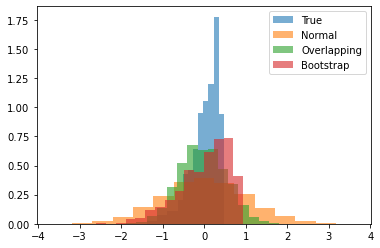

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.008 & 0.116 & -0.047 & 0.018 & -0.047 & 0.058 \\
Bootstrap & 0.012 & 0.364 & -0.197 & 0.064 & -0.197 & 0.460 \\
Normal & -0.006 & 0.996 & -0.010 & -0.033 & -0.010 & 2.938 \\
Overlapping & -0.036 & 0.307 & 0.006 & -0.024 & 0.006 & 0.258 \\
\bottomrule
\end{tabular}
\end{center}


In [9]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=9)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

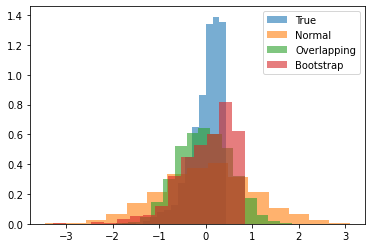

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.005 & 0.113 & -0.050 & 0.026 & -0.050 & 0.065 \\
Bootstrap & 0.013 & 0.336 & -0.224 & 0.219 & -0.223 & 0.554 \\
Normal & 0.023 & 1.002 & 0.009 & -0.069 & 0.009 & 2.944 \\
Overlapping & -0.017 & 0.318 & 0.013 & -0.032 & 0.013 & 0.271 \\
\bottomrule
\end{tabular}
\end{center}


In [10]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=9)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

# K = 19

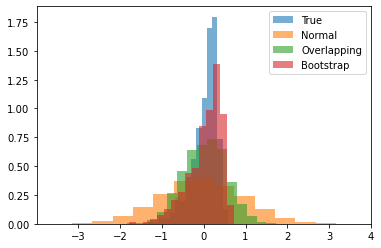

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.036 & 0.087 & -0.030 & 0.011 & -0.030 & 0.034 \\
Bootstrap & 0.038 & 0.155 & -0.068 & 0.028 & -0.068 & 0.100 \\
Normal & -0.029 & 0.966 & 0.071 & 0.045 & 0.071 & 2.841 \\
Overlapping & 0.022 & 0.258 & -0.012 & -0.011 & -0.012 & 0.189 \\
\bottomrule
\end{tabular}
\end{center}


In [11]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=19)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

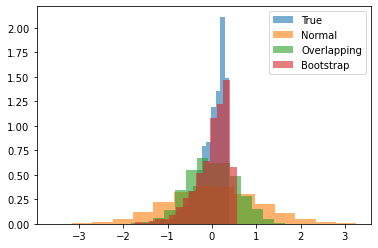

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.007 & 0.090 & -0.032 & 0.009 & -0.031 & 0.032 \\
Bootstrap & 0.010 & 0.148 & -0.076 & 0.045 & -0.076 & 0.110 \\
Normal & 0.009 & 1.006 & 0.004 & -0.103 & 0.004 & 2.931 \\
Overlapping & 0.006 & 0.300 & 0.004 & -0.032 & 0.004 & 0.238 \\
\bottomrule
\end{tabular}
\end{center}


In [12]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=19)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)

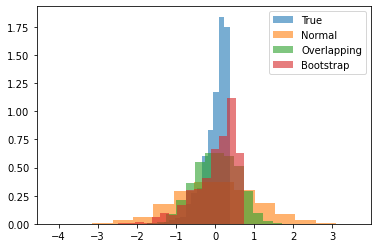

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.006 & 0.090 & -0.040 & 0.023 & -0.040 & 0.046 \\
Bootstrap & 0.017 & 0.293 & -0.195 & 0.122 & -0.194 & 0.378 \\
Normal & -0.001 & 1.000 & -0.034 & -0.045 & -0.034 & 2.953 \\
Overlapping & 0.041 & 0.302 & -0.012 & -0.036 & -0.012 & 0.238 \\
\bottomrule
\end{tabular}
\end{center}


In [13]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=19)
vuong_plots.plot_kstats_table(gen_data_ex,setup_test)